In [103]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import matplotlib.patches

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

#% matplotlib inline
#% matplotlib auto

In [104]:
run_info = 'FMAASO'
skip_time=0

# GEO EM FILE

In [105]:
geo_em_ncfile = netCDF4.Dataset('/Users/baird/Dropbox/_data_WRF/geo_em.d01_amazon_50km.nc')
HGT_M = geo_em_ncfile.variables['HGT_M'][0,:,:]

# time, LAT, LON ncfiles

In [106]:
xlat_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

# import FMAASO 400 data

In [107]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')
u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')
w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')

In [108]:
time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

z = qvapor_ncfile.variables['z'][:]
qvapor_400 = qvapor_ncfile.variables['QVAPOR'][:] * 1000.
u_400 = u_ncfile.variables['U'][:]
v_400 = v_ncfile.variables['V'][:]

/Users/baird/anaconda/lib/python3.6/site-packages/numpy/ma/core.py:1016: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


# import FMAASO 1000 data

In [109]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')
u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')
w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')

In [110]:
time_var_1000 = time_ncfile.variables['Times']
time_1000 = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

qvapor_1000 = qvapor_ncfile.variables['QVAPOR'][:] * 1000.
u_1000 = u_ncfile.variables['U'][:]
v_1000 = v_ncfile.variables['V'][:]

/Users/baird/anaconda/lib/python3.6/site-packages/numpy/ma/core.py:1016: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


# get time stamps

In [111]:
time_datetimes = numpy.zeros(time.shape[0], dtype=object)
for t in range(time.shape[0]):
    time_string = ''.join([i.decode('utf-8') for i in time[t,:]])
    year,month,day = time_string.split('_')[0].split('-')
    hour,minute,second = time_string.split('_')[1].split(':')
    time_datetimes[t] = datetime.datetime(int(year),int(month),int(day),int(hour),int(second),int(minute))

In [112]:
# SET ALL OCEAN GRID POINTS EQUAL TO NAN
qvapor_400_landmask = numpy.copy(qvapor_400)
qvapor_400_landmask[:,:,landmask==0] = numpy.nan

qvapor_1000_landmask = numpy.copy(qvapor_1000)
qvapor_1000_landmask[:,:,landmask==0] = numpy.nan

u_400_landmask = numpy.copy(u_400)
u_400_landmask[:,:,landmask==0] = numpy.nan

u_1000_landmask = numpy.copy(u_1000)
u_1000_landmask[:,:,landmask==0] = numpy.nan

v_400_landmask = numpy.copy(v_400)
v_400_landmask[:,:,landmask==0] = numpy.nan

v_1000_landmask = numpy.copy(v_1000)
v_1000_landmask[:,:,landmask==0] = numpy.nan

threshold = 9.96921e+36

u_400_landmask[u_400_landmask==threshold] = numpy.nan
u_1000_landmask[u_1000_landmask==threshold] = numpy.nan
v_400_landmask[v_400_landmask==threshold] = numpy.nan
v_1000_landmask[v_1000_landmask==threshold] = numpy.nan
qvapor_400_landmask[qvapor_400_landmask==threshold] = numpy.nan
qvapor_1000_landmask[qvapor_1000_landmask==threshold] = numpy.nan


# calculate uv magnitudes

In [113]:
uv_400_landmask = numpy.sqrt(u_400_landmask**2. + v_400_landmask**2.)
uv_1000_landmask = numpy.sqrt(u_1000_landmask**2. + v_1000_landmask**2.)

# calculate uv differences

In [114]:
u_diffs_landmask = u_1000_landmask-u_400_landmask
v_diffs_landmask = v_1000_landmask-v_400_landmask

In [115]:
# PULL OUT LONGITUDINAL AND LATITUDINAL RANGE
lon_hi = -34.
lon_lo = -70.
lat_lo = -8.
lat_hi = 12.

In [116]:
################################################################################
################################################################################
# CALCULATE DIFFERENCES, FORCE TO BE LAND ONLY GRID POINTS

xlat_indices = numpy.array((xlat>=lat_lo) & (xlat<=lat_hi), dtype=bool)
xlong_indices = numpy.array((xlong>=lon_lo) & (xlong<=lon_hi), dtype=bool)
xlat_subset = xlat[xlat_indices[:,0],:]
xlat_subset = xlat_subset[:,xlong_indices[0,:]]
xlong_subset = xlong[xlat_indices[:,0],:]
xlong_subset = xlong_subset[:,xlong_indices[0,:]]

# QVAPOR DIFFERENCES
print("differences")
skip_time = 1
qvapor_landmask_diffs = qvapor_1000_landmask[skip_time:,:,:,:] - qvapor_400_landmask[skip_time:,:,:,:]
uv_landmask_diffs = uv_1000_landmask[skip_time:,:,:,:] - uv_400_landmask[skip_time:,:,:,:]
time = time[skip_time:]

# QVAPOR SUBSET LATITUDES
print("latitude and longitude subset")
qvapor_landmask_diffs = qvapor_landmask_diffs[:,:,xlat_indices[:,0],:]
qvapor_landmask_diffs = qvapor_landmask_diffs[:,:,:,xlong_indices[0,:]]

uv_landmask_diffs = uv_landmask_diffs[:,:,xlat_indices[:,0],:]
uv_landmask_diffs = uv_landmask_diffs[:,:,:,xlong_indices[0,:]]

# TAKE REGIONAL SUBSETS
uv_400_landmask_region = uv_400_landmask[skip_time:,:,xlat_indices[:,0],:]
uv_400_landmask_region = uv_400_landmask_region[:,:,:,xlong_indices[0,:]]
uv_1000_landmask_region = uv_1000_landmask[skip_time:,:,xlat_indices[:,0],:]
uv_1000_landmask_region = uv_1000_landmask_region[:,:,:,xlong_indices[0,:]]
qvapor_400_landmask_region = qvapor_400_landmask[skip_time:,:,xlat_indices[:,0],:]
qvapor_400_landmask_region = qvapor_400_landmask_region[:,:,:,xlong_indices[0,:]]
qvapor_1000_landmask_region = qvapor_1000_landmask[skip_time:,:,xlat_indices[:,0],:]
qvapor_1000_landmask_region = qvapor_1000_landmask_region[:,:,:,xlong_indices[0,:]]

differences
latitude and longitude subset


# Plot the region where these anomalies are calculated

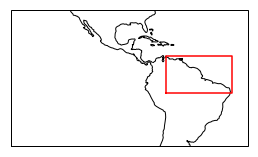

In [117]:
fig,ax = mp.subplots(nrows=1,ncols=1,subplot_kw={'projection':cartopy.crs.PlateCarree()})
fig.set_size_inches(4.25,2.5)

ax.coastlines(resolution='110m')
ax.set_extent([xlong.min(), xlong.max(), xlat.min(), xlat.max()], crs=cartopy.crs.PlateCarree())

lon0,lon1,lat0,lat1 = ax.get_extent()
box_x = [lon_lo, lon_hi, lon_hi, lon_lo, lon_lo]
box_y = [lat_lo, lat_lo, lat_hi, lat_hi, lat_lo]

ax.plot(box_x, box_y, color='red',  transform=cartopy.crs.PlateCarree())
#matplotlib.patches.Rectangle

# regional subsets of u and v diffs (for angle caculations)

In [118]:
u_diffs_landmask_region = u_diffs_landmask[:,:,xlat_indices[:,0],:]
u_diffs_landmask_region = u_diffs_landmask_region[:,:,:,xlong_indices[0,:]]

v_diffs_landmask_region = v_diffs_landmask[:,:,xlat_indices[:,0],:]
v_diffs_landmask_region = v_diffs_landmask_region[:,:,:,xlong_indices[0,:]]

In [119]:
u_400_landmask_region = u_400_landmask[:,:,xlat_indices[:,0],:]
u_400_landmask_region = u_400_landmask_region[:,:,:,xlong_indices[0,:]]

v_400_landmask_region = v_400_landmask[:,:,xlat_indices[:,0],:]
v_400_landmask_region = v_400_landmask_region[:,:,:,xlong_indices[0,:]]

In [120]:
u_400_time_mean = numpy.nanmean(u_400_landmask_region, axis=0)
u_400_time_space_mean = numpy.nanmean(u_400_time_mean, axis=(1,2))

v_400_time_mean = numpy.nanmean(v_400_landmask_region, axis=0)
v_400_time_space_mean = numpy.nanmean(v_400_time_mean, axis=(1,2))

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [121]:
u_diffs_time_mean = numpy.nanmean(u_diffs_landmask_region, axis=0)
u_diffs_time_space_mean = numpy.nanmean(u_diffs_time_mean, axis=(1,2))

v_diffs_time_mean = numpy.nanmean(v_diffs_landmask_region, axis=0)
v_diffs_time_space_mean = numpy.nanmean(v_diffs_time_mean, axis=(1,2))

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


In [122]:
# ============================================================================ #
# overbar(quv) = overbar(overbar(q)*overbar(w)) + overbar(qprime*wprime)
### overbar(quv)

quv_400_landmask = uv_400_landmask_region*qvapor_400_landmask_region
quv_1000_landmask = uv_1000_landmask_region*qvapor_1000_landmask_region

quv_400_time_mean = numpy.nanmean(quv_400_landmask, axis=0)
quv_1000_time_mean = numpy.nanmean(quv_1000_landmask, axis=0)

quv_400_time_space_mean = numpy.nanmean(quv_400_time_mean, axis=(1,2))
quv_1000_time_space_mean = numpy.nanmean(quv_1000_time_mean, axis=(1,2))

quv_diffs_overbar = quv_1000_time_space_mean - quv_400_time_space_mean

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


In [123]:
# ================================================================================
### overbar(q)*overbar(w)

qvapor_400_time_mean = numpy.nanmean(qvapor_400_landmask_region, axis=0)
qvapor_1000_time_mean = numpy.nanmean(qvapor_1000_landmask_region, axis=0)

uv_400_time_mean = numpy.nanmean(uv_400_landmask_region, axis=0)
uv_1000_time_mean = numpy.nanmean(uv_1000_landmask_region, axis=0)

qbar_uvbar_400 = qvapor_400_time_mean*uv_400_time_mean
qbar_uvbar_1000 = qvapor_1000_time_mean*uv_1000_time_mean
qbar_uvbar_400_space_mean = numpy.nanmean(qbar_uvbar_400, axis=(1,2))
qbar_uvbar_1000_space_mean = numpy.nanmean(qbar_uvbar_1000, axis=(1,2))

qbar_uvbar_diffs = qbar_uvbar_1000-qbar_uvbar_400
qbar_uvbar_diffs_space_mean = numpy.nanmean(qbar_uvbar_diffs, axis=(1,2))

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


In [124]:
# ================================================================================
### overbar(qprime*uvprime)

qprime_400 = qvapor_400_landmask_region - qvapor_400_time_mean
qprime_1000 = qvapor_1000_landmask_region - qvapor_1000_time_mean

uvprime_400 = uv_400_landmask_region - uv_400_time_mean
uvprime_1000 = uv_1000_landmask_region - uv_1000_time_mean

qprime_uvprime_400 = qprime_400*uvprime_400
qprime_uvprime_1000 = qprime_1000*uvprime_1000

qprime_uvprime_400_time_mean = numpy.nanmean(qprime_uvprime_400, axis=0)
qprime_uvprime_1000_time_mean = numpy.nanmean(qprime_uvprime_1000, axis=0)
qprime_uvprime_400_space_mean = numpy.nanmean(qprime_uvprime_400_time_mean, axis=(1,2))
qprime_uvprime_1000_space_mean = numpy.nanmean(qprime_uvprime_1000_time_mean, axis=(1,2))

qprime_uvprime_diffs = qprime_uvprime_1000_time_mean - qprime_uvprime_400_time_mean
qprime_uvprime_diffs_space_mean = numpy.nanmean(qprime_uvprime_diffs, axis=(1,2))

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


/Users/baird/anaconda/lib/python3.6/site-packages/matplotlib/quiver.py:719: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/Users/baird/anaconda/lib/python3.6/site-packages/matplotlib/quiver.py:733: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


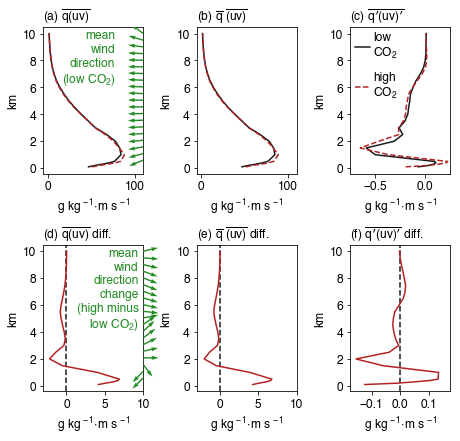

In [135]:
fontsize=12
fig,ax=mp.subplots(ncols=3,nrows=2)
fig.set_size_inches(6.5,6)

ax[0,0].plot(quv_400_time_space_mean, z, c='0.1', label='low CO$_2$')
ax[0,0].plot(quv_1000_time_space_mean, z, c='firebrick', ls='--', label='high CO$_2$')
ax[0,0].tick_params(labelsize=fontsize)
#handles, labels = ax[0,0].get_legend_handles_labels()
#ax[0,0].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(0.99,0.99), bbox_transform=ax[0,0].transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

ax[1,0].axvline(x=0, c='0.1', ls='--')
ax[1,0].plot(quv_diffs_overbar, z, c='firebrick', label='diffs')
ax[1,0].tick_params(labelsize=fontsize)

# =====
ax[0,2].plot(qprime_uvprime_400_space_mean, z, c='0.1', label='low\nCO$_2$')
ax[0,2].plot(qprime_uvprime_1000_space_mean, z, c='firebrick', ls='--', label='high\nCO$_2$')
ax[0,2].tick_params(labelsize=fontsize)
handles, labels = ax[0,2].get_legend_handles_labels()
ax[0,2].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(0.02,0.98), \
               bbox_transform=ax[0,2].transAxes, loc='upper left', borderaxespad=0, \
               labelspacing=1, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

ax[1,2].axvline(x=0, c='0.1', ls='--')
ax[1,2].plot(qprime_uvprime_diffs_space_mean, z, c='firebrick', label='diffs')
ax[1,2].tick_params(labelsize=fontsize)

# =====
ax[0,1].plot(qbar_uvbar_400_space_mean, z, c='0.1', label='low CO$_2$')
ax[0,1].plot(qbar_uvbar_1000_space_mean, z, c='firebrick', ls='--', label='high CO$_2$')
ax[0,1].tick_params(labelsize=fontsize)
#handles, labels = ax[0,1].get_legend_handles_labels()
#ax[0,1].legend(handles, labels, fontsize=fontsize, scatterpoints=2, ncol=1, bbox_to_anchor=(0.99,0.99), bbox_transform=ax[0,1].transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)


ax[1,1].axvline(x=0, c='0.1', ls='--')
ax[1,1].plot(qbar_uvbar_diffs_space_mean, z, c='firebrick', label='diffs')
ax[1,1].tick_params(labelsize=fontsize)

ax[0,0].text(s='(a) '+r"$\overline{q(uv)}$", x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[0,0].transAxes)
ax[0,1].text(s='(b) '+r"$\overline{q} \,\, \overline{(uv)}$", x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[0,1].transAxes)
ax[0,2].text(s='(c) '+r"$\overline{q \prime (uv) \prime}$", x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[0,2].transAxes)
ax[1,0].text(s='(d) '+r"$\overline{q(uv)}$"+' diff.', x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[1,0].transAxes)
ax[1,1].text(s='(e) '+r"$\overline{q} \,\, \overline{(uv)}$"+' diff.', x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[1,1].transAxes)
ax[1,2].text(s='(f) '+r"$\overline{q \prime (uv) \prime}$"+' diff.', x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[1,2].transAxes)

ax[0,0].set_xlim(-5,110)
ax[0,1].set_xlim(-5,110)
ax[0,2].set_xlim(-0.75,0.25)

ax[1,0].set_xlim(-3,10)
ax[1,1].set_xlim(-3,10)
ax[1,2].set_xlim(-0.175,0.175)

ax[1,0].set_xticks([0,5,10])
ax[1,1].set_xticks([0,5,10])
# ax[1,2].set_xticks([-0.00035,0,0.00035])

# ax[1,0].set_xticklabels(['-0.0035','0','0.0035'])
# ax[1,1].set_xticklabels(['-0.0035','0','0.0035'])
# ax[1,2].set_xticklabels(['-0.00035','0','0.00035'])

# ax[1,0].set_xlabel('diffs in '+r"$\overline{q w}$", fontsize=fontsize)
# ax[1,2].set_xlabel('diffs in '+r"$\overline{q \prime w \prime}$", fontsize=fontsize)
# ax[0,1].set_xlabel(r"$\overline{q \prime w \prime}$", fontsize=fontsize)
# ax[1,1].set_xlabel('diffs in '+r"$\overline{\overline{q} \, \overline{w}}$", fontsize=fontsize)
# ax[0,0].set_xlabel(r"$\overline{q w}$", fontsize=fontsize)
# ax[0,2].set_xlabel(r"$\overline{q \prime w \prime}$", fontsize=fontsize)

ax[0,0].set_ylabel('km', fontsize=fontsize)
ax[1,0].set_ylabel('km', fontsize=fontsize)
ax[0,1].set_ylabel('km', fontsize=fontsize)
ax[1,1].set_ylabel('km', fontsize=fontsize)
ax[0,2].set_ylabel('km', fontsize=fontsize)
ax[1,2].set_ylabel('km', fontsize=fontsize)

ax[0,0].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[1,0].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[0,1].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[1,1].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[0,2].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[1,2].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)

fig.tight_layout(h_pad=2.5)#, w_pad=0)

# ADD WIND DIRECTION CHANGES
ax_pos = ax[0,0].get_position()
ax_width=0.05
ax00_quiver = fig.add_axes([ax_pos.x1-ax_width, ax_pos.y0,2*ax_width,ax_pos.height])
Xloc = numpy.zeros(v_diffs_time_space_mean.size)
Yloc = z
lev_subset = [0,6]+list(range(7,26))
uv_mag = numpy.sqrt(u_400_time_space_mean**2. + v_400_time_space_mean**2.)*1.75
ax00_quiver.quiver(Xloc[lev_subset], \
                   Yloc[lev_subset], \
                   u_400_time_space_mean[lev_subset], \
                   v_400_time_space_mean[lev_subset], \
                   color='forestgreen', \
                   angles='uv', scale=uv_mag[lev_subset]*1.75, pivot='tail', width=0.03)#, \
                   #clip_on=False)
ax00_quiver.axis('off')

ax00_quiver.text(s='mean\nwind\ndirection\n(low CO$_2$)', x=-0.1, y=0.97, ha='right', va='top', \
                transform=ax00_quiver.transAxes, \
                color='forestgreen', fontsize=fontsize)

ax_pos = ax[1,0].get_position()
ax_width=0.05
ax10_quiver = fig.add_axes([ax_pos.x1-ax_width, ax_pos.y0,2*ax_width,ax_pos.height])
Xloc = numpy.zeros(v_diffs_time_space_mean.size)
Yloc = z
lev_subset = [0,6]+list(range(7,26))
uv_mag = numpy.sqrt(u_diffs_time_space_mean**2. + v_diffs_time_space_mean**2.)*1.75
ax10_quiver.quiver(Xloc[lev_subset], \
                   Yloc[lev_subset], \
                   u_diffs_time_space_mean[lev_subset], \
                   v_diffs_time_space_mean[lev_subset], \
                   color='forestgreen', \
                   angles='uv', scale=uv_mag[lev_subset]*1.75, pivot='tail', width=0.03)#, \
                   #clip_on=False)
ax10_quiver.axis('off')
#ax00_quiver.set_xlim(-300,300)

ax10_quiver.text(s='mean\nwind\ndirection\nchange\n(high minus\nlow CO$_2$)', x=0.4, y=0.97, ha='right', va='top', \
                transform=ax10_quiver.transAxes, \
                color='forestgreen', fontsize=fontsize)

mp.show()

fig.savefig('figure9_quv_decomposition.png', dpi=600, bbox_inches='tight', transparent=True)